In [116]:
# Importamos las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Cargamos los datos 
cars= pd.read_csv('ML_cars.csv')
cars.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Imprimimos la infromacion del dataframe
cars.info()

Empezamos hacer el analisis sobre los datos

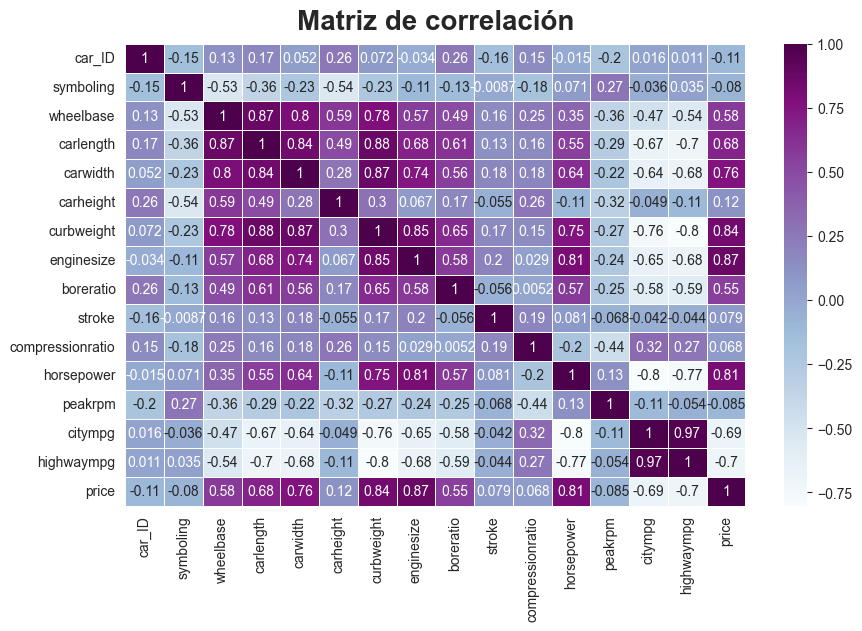

In [121]:
# Seleccionamos las variables numericas para ver si relacion con el precio
cars_numeric= cars.select_dtypes(include=[np.number])

# Graficamos la matriz de correlacion 
plt.figure(figsize=(10, 6))
sns.heatmap(cars_numeric.corr(), annot=True, cmap='BuPu', linewidths=.5)
plt.title('Matriz de correlación', fontweight='bold', fontsize=20, ha='center', va='bottom')
plt.show()


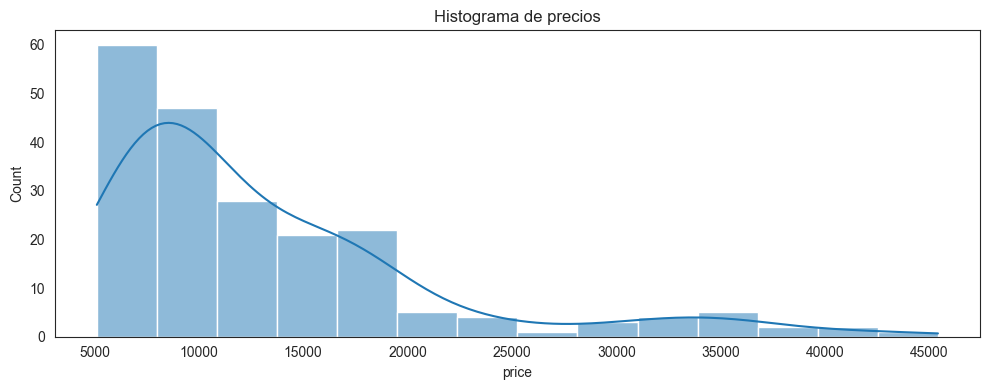

In [127]:
# Graficamos un histograma sobre el precio, para ver como se encuentra distribuido
plt.figure(figsize=(10,4))
sns.set_style("white")
sns.histplot(data= cars_numeric, x= 'price', kde= True)
plt.title('Histograma de precios')
plt.tight_layout()

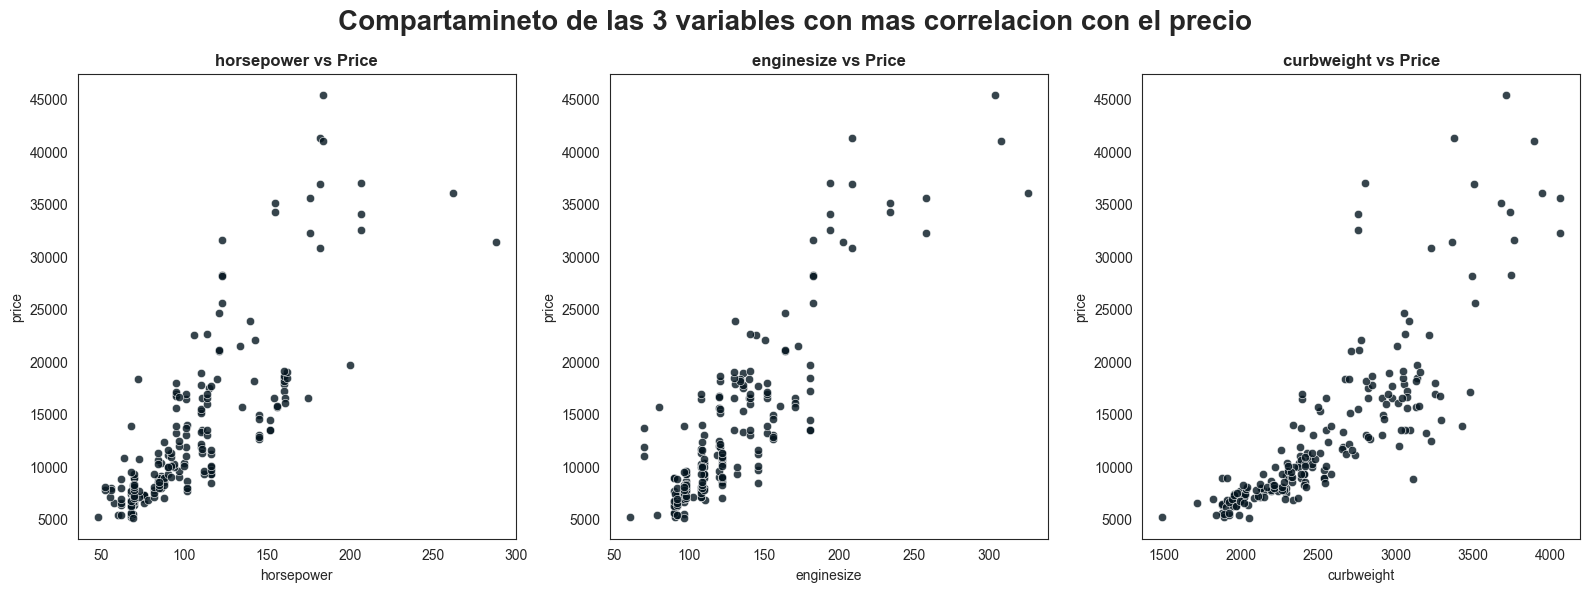

In [128]:
# Seleccionamos las 3 variables con mas correlacion positiva respecto al precio
columns = cars_numeric[['horsepower','enginesize','curbweight' ]]

# graficamos un scatterplot por variable vs el precio para ver la correlacion graficamente
plt.figure(figsize=(16, 6))
sns.set_style("white")

for i, column in enumerate(columns):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=cars_numeric, x=column, y='price', alpha= 0.8, color= '#04151F')
    plt.title(f'{column} vs Price',  fontweight="bold")
    plt.grid(False)
    plt.tight_layout()
    plt.suptitle('Compartamineto de las 3 variables con mas correlacion con el precio', fontsize=20, fontweight="bold")

plt.show()


In [129]:
# Ahora solo seleccionamos las variables categoricas y vemos cuantas categorias hay y cuantos valores tiene cada categoria
cars_category= cars.select_dtypes(include=['object'])

for column in cars_category:
    print("\n",cars_category[column].value_counts())


 CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

 fueltype
gas       185
diesel     20
Name: count, dtype: int64

 aspiration
std      168
turbo     37
Name: count, dtype: int64

 doornumber
four    115
two      90
Name: count, dtype: int64

 carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

 drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

 enginelocation
front    202
rear       3
Name: count, dtype: int64

 enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

 cylindernumber
four      159
six        24
five       11
eight       5
tw

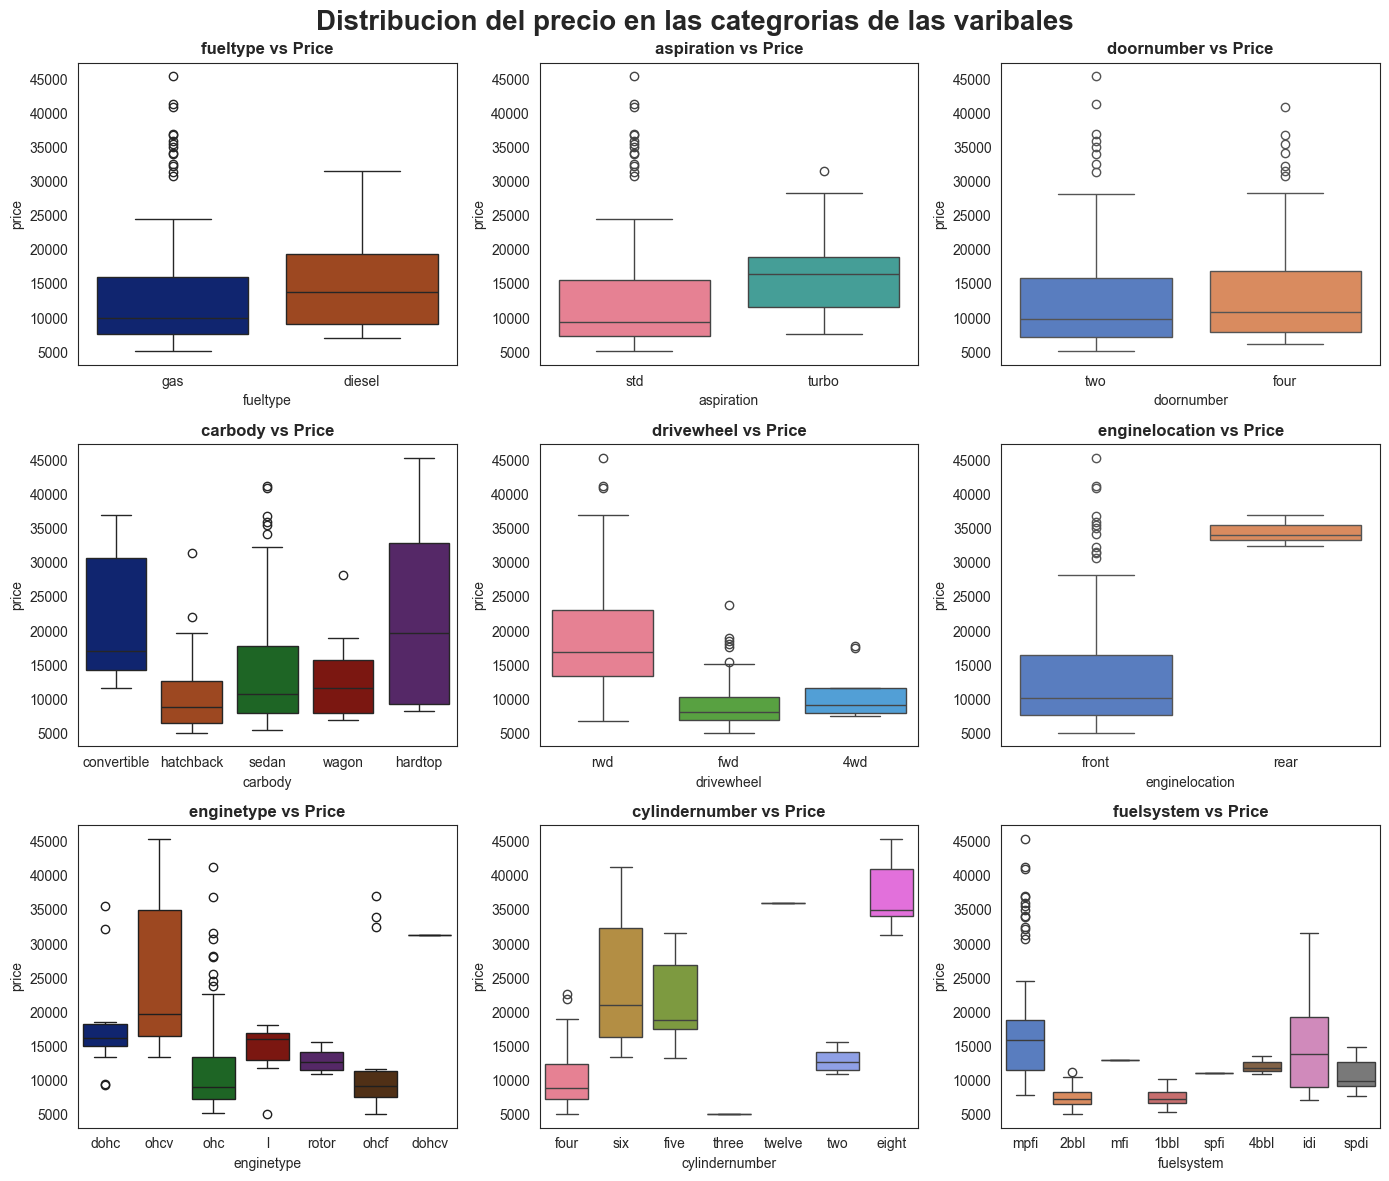

In [130]:
# Creamos un barplot por categoria vs el precio para ver como se encuentra distibuido por categoria 
# Eliminamos la varible que contiene el nombre de cada carro
columns= cars_category.drop('CarName', axis= 1)
paletas = ['dark', 'husl', 'muted','dark','husl', 'muted','dark', 'husl', 'muted']
sns.set_style("white")
plt.figure(figsize=(14,12))

for i, (column, paleta) in enumerate(zip(columns,paletas)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=cars, x=column, y= 'price', hue=column, palette=paleta)
    plt.title(f'{column} vs Price', fontweight="bold")
    plt.grid(False)
    plt.tight_layout()
    plt.suptitle('Distribucion del precio en las categrorias de las varibales',fontsize=20, fontweight="bold")
plt.show()


In [134]:
# De las variables categoricas elimanmos nuevamente la varibale que contiene el nombre del auto
cars_dummies= cars_category.drop('CarName', axis= 1)
#  A las variables categoricas le agregamos el precio para ver su correlacion 
cars_dummies = pd.concat([cars_dummies, cars_numeric['price']], axis= 1)
# Le sacamos las dummies a cada variable categorica 
cars_dummies=pd.get_dummies(cars_dummies)
# Y calculamos la matriz de correlacion 
price_corr_cate= cars_dummies.corr()
# Seleccionamos la columna de la matriz donde esten las correlaciones del precio
price_corr_cate= price_corr_cate.loc['price']
# Seleccionamos las corellaciones que sean mayores a 0.10 en valor absoluto
price_corr_cate= price_corr_cate[abs(price_corr_cate) > 0.10]
# Imprimimos los valores 
price_corr_cate

price                    1.000000
fueltype_diesel          0.105679
fueltype_gas            -0.105679
aspiration_std          -0.177926
aspiration_turbo         0.177926
carbody_convertible      0.187681
carbody_hardtop          0.225854
carbody_hatchback       -0.262039
carbody_sedan            0.125716
drivewheel_fwd          -0.601950
drivewheel_rwd           0.638957
enginelocation_front    -0.324973
enginelocation_rear      0.324973
enginetype_dohc          0.151429
enginetype_dohcv         0.159225
enginetype_ohc          -0.344270
enginetype_ohcv          0.385991
cylindernumber_eight     0.478614
cylindernumber_five      0.249606
cylindernumber_four     -0.697762
cylindernumber_six       0.474978
cylindernumber_twelve    0.199634
fuelsystem_1bbl         -0.170945
fuelsystem_2bbl         -0.501374
fuelsystem_idi           0.105679
fuelsystem_mpfi          0.517075
Name: price, dtype: float64

In [136]:
# Borramos de los datos la columna CarID ya que esta es solamente el numero que presenta cada observacion en la muestra 
cars_numeric.drop('car_ID', axis= 1, inplace= True)

In [137]:
# importamos el StandardScaler para hacerle un escalado a los datos y ver si el modelo los puede interpretar mejor
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
# Los escalamos
cars_numeric_sca= ss.fit_transform(cars_numeric)
# Los transformamos en un dataframe
cars_numeric_sca= pd.DataFrame(cars_numeric_sca, columns= cars_numeric.columns)
cars_numeric_sca


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.447752
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.723810
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,1.029983
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,1.153582


In [140]:
# Borramos del dataframe de varaibles categoricas el precio ya que lo tenemos en los datos numericos y colocarlo 2 veces seria redundancia
cars_dummies.drop('price', axis= 1, inplace= True)
# Ahora concatenamos nuestras variables categoricas con las variables numericas 
datos_sca= pd.concat([cars_dummies, cars_numeric_sca], axis= 1)

Una vez hecho el analisis sobre los datos procedemos a la etapada del modelamiento 

In [141]:
# Seleccionamos nuestro traget que en este caso es el precio
y_sca= datos_sca['price']
# Dejamos las variables que vamos a usar para predecir nuestro traget
x_sca= datos_sca.drop('price', axis=1)

# Importamos el modulo de sklearn que nos ayuda a separar a nuestro conjunto de datos en entrenamiento y prueba 
from sklearn.model_selection import train_test_split

# Separamos nuestro conjunto de datos 
x_train_sca, x_test_sca, y_train_sca, y_test_sca = train_test_split(x_sca, y_sca, test_size= 0.20, random_state= 18)

# Imprimimos los tamaños de cada grupo
print(x_train_sca.shape)
print(x_test_sca.shape)
print(y_train_sca.shape)
print(y_test_sca.shape)

(164, 52)
(41, 52)
(164,)
(41,)


In [142]:
# Importamos el modelo de sklearn  de regresion lineal y lo inicialzamos 
from sklearn.linear_model import LinearRegression
lineal_reg_sca= LinearRegression()

In [143]:
# Entrenaomo nuestro modelo con los datos de entrenamiento
lineal_reg_sca.fit(x_train_sca,y_train_sca)

LinearRegression()

In [144]:
# Hacemos nuestras predicciones
lineal_predict_sca= lineal_reg_sca.predict(x_test_sca)

Ahora bien a la horade evaluar un modele de regresion existen varias metricas que se pueden usar, en este escenario usaremos:

* **Error absoluto medio (MAE)**: Calcula el promedio de las diferencias absolutas entre los valores predichos y los valores reales. Al igual que el MSE, un valor más bajo es mejor.
* **Coeficiente de correlación (R²)**: Indica cuánto de la variación en la variable dependiente puede explicarse por el modelo. R² varía entre 0 y 1, donde 1 indica una predicción perfecta y 0 indica que el modelo no explica nada de la variabilidad de la variable dependiente.

In [145]:
# Importamos las metricas que vamos usas de sklearn
from sklearn.metrics import mean_absolute_error, r2_score
# Definimos las varibles donde almacenaremos los resultados de las metricas 
mae = round(mean_absolute_error(y_test_sca, lineal_predict_sca),3)
r2 = round(r2_score(y_test_sca, lineal_predict_sca),3) 
# Printeamos los resultados 
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 0.325
R²: 0.854


Este tipo de metricas son muy importantes a la hora de evaluar y ver el rendomiento que tiene el modelo, pero existen otras vias, como la grafica por ejepmlo.


El siguiente grafico tambien podria explicar el rendimiento del modelo. Podemos interpretar el siguiente grafico de la siguiente manera:

* La linea punteada respresenta una prediccion perfecta por
* Los puntos son las combinaciones entre la prediccion del modelo y el valor real 

Por lo anterior podemos deducir que entre mas alejados de la linea esten los puntos, quiere decir que hay ciertos errores en el modelo al hora de hacer la predicciones.

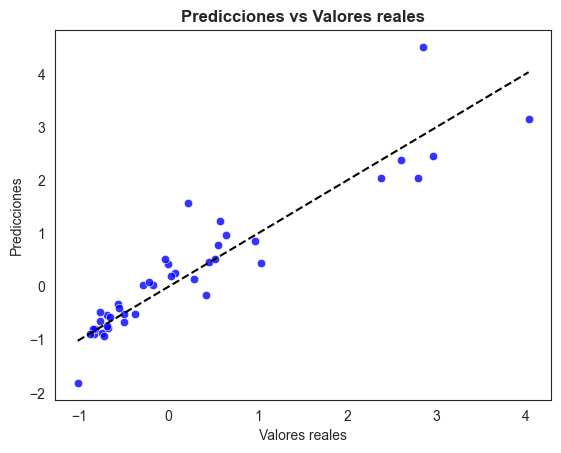

In [148]:
# Realizamos el grafico 
sns.set_style("white")
sns.scatterplot(x=y_test_sca, y=lineal_predict_sca, color= 'blue',alpha= 0.8)
plt.plot([y_test_sca.min(), y_test_sca.max()], [y_test_sca.min(), y_test_sca.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales", fontweight="bold")
plt.grid(False)

plt.show()

Otra forma muy bueena de ver como se comporta el modelo es viendo la distribucion de los errores, en este caso se busca que los se encuentre lo mas distribuidos en 0.

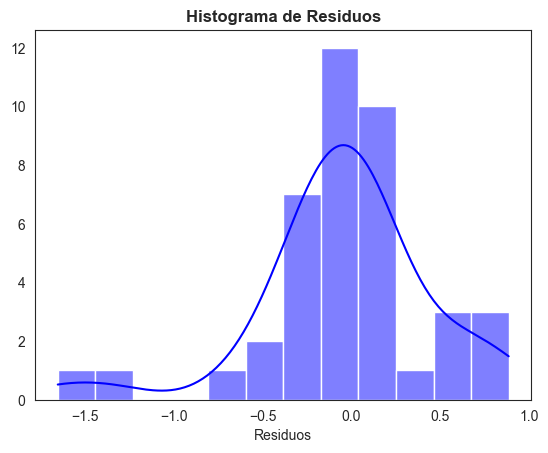

In [150]:
# Calculamos las errores
errores = y_test_sca - lineal_predict_sca

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(errores, color= 'blue', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

Viendo como se comporta el modelo de regresion lienal, podemos de que en general tiene buenas metricas, pero tambiene extisten otros modelos que se puden usar en este planteamiento, y uno que usaremos es el RandomForestRegressor y veremos su comportamiento.


In [151]:
# Importamos el modelo de sklearn y lo inicializamos 
from sklearn.ensemble import RandomForestRegressor
randomf= RandomForestRegressor()

In [152]:
# Entrenamos el modelo
randomf.fit(x_train_sca,y_train_sca)

RandomForestRegressor()

In [153]:
rf_predict_sca= randomf.predict(x_test_sca)

Como es un problema de regresion tambine podemos evaluar el modelo con los mismos graficos y metricas que la regresion lineal

In [154]:
# Calculamos las metricas 
mae = round(mean_absolute_error(y_test_sca, rf_predict_sca),3)
r2 = round(r2_score(y_test_sca, rf_predict_sca),3)
# Printeamos los resultamos 
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 0.211
R²: 0.939


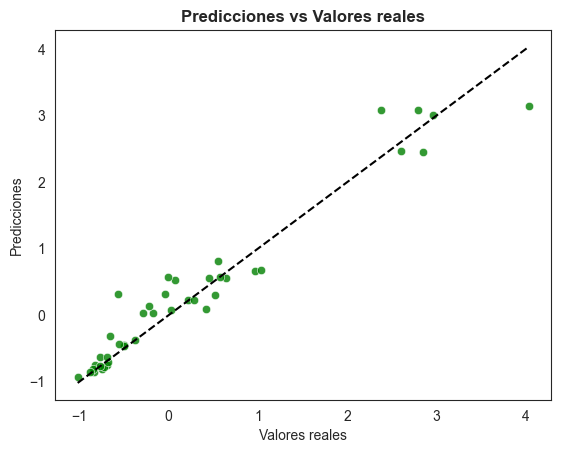

In [156]:
# Realizamos el grafico 
sns.set_style("white")
sns.scatterplot(x=y_test_sca, y= rf_predict_sca, color= 'green',alpha= 0.8)
plt.plot([y_test_sca.min(), y_test_sca.max()], [y_test_sca.min(), y_test_sca.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales", fontweight="bold")
plt.grid(False)

plt.show()

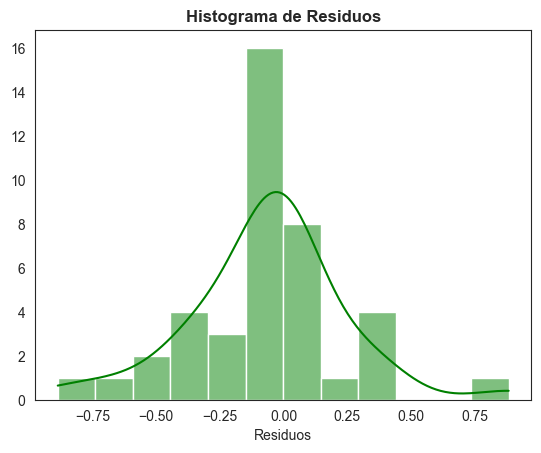

In [158]:
#Calculamos los errores
errores = y_test_sca - rf_predict_sca

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(errores, color= 'green', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

Como pudimos obervar para este planteamiento del problema pudimos ver que el modelo de RandomForest se comporto mejor que el modelo de RegresionLineal

Como nota usamos los datos escalados porque en teoria el modelos los puede identificar de mejor manera, pero sin embargo todas las veces esto no es necesario, por lo que obtaremos por entrenar los modelos sin escalar los datos para evaluar su comportamiento y ver si hay diferencias significativas.

En esencia la metodologia de entreamiento y evaluacion es la misma.

In [160]:
# Tomamos los datos sin escalar 
datos= pd.concat([cars_dummies, cars_numeric],axis=1)

In [161]:
# Dividimos los datos en caracteristicas y target
x= datos.drop('price', axis=1)
y= datos['price']

In [162]:
# Lo dividimos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=18)

In [163]:
# Inicializamos nuestro modelo
lineal_reg= LinearRegression()

In [164]:
# Entrenamos
lineal_reg.fit(x_train,y_train)    

LinearRegression()

In [165]:
# Hacemos las predicciones 
lineal_predict= lineal_reg.predict(x_test)

In [166]:
# Calculamos las metricas 
mae = round(mean_absolute_error(y_test, lineal_predict),3)
r2 = round(r2_score(y_test, lineal_predict),2)

# Imprimos las metricas
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 2571.237
R²: 0.85


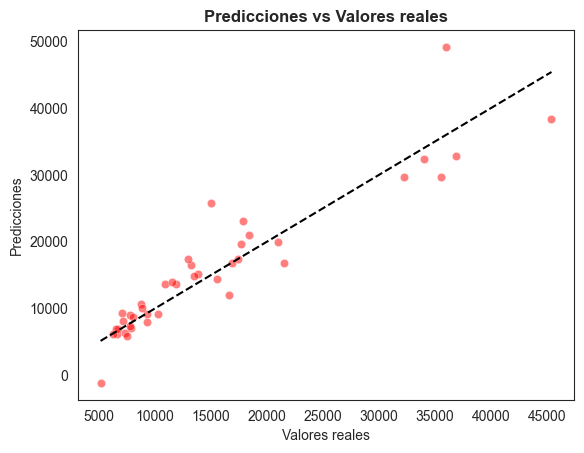

In [167]:
# Realizamos el grafico
sns.set_style("white")
sns.scatterplot(x=y_test, y= lineal_predict, color= 'red',alpha= 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales", fontweight="bold")
plt.grid(False)

plt.show()

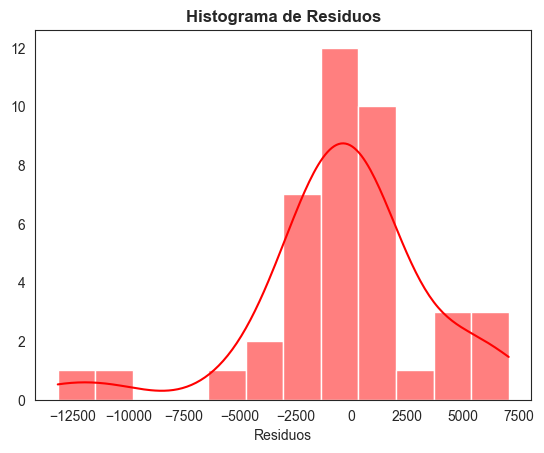

In [168]:
# Calculamos los errores
errores = y_test - lineal_predict

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(errores, color= 'red', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

Viendo que no hay diferencia significativa entre los modelos con los datos escalados y sin escalar en caso de la regresion lineal, lo que hacemos ahora es sacar los coeficientes de cada cariable y ver cuales son las mas influyentes a la hora de determinar le precio segun nuestro modelo.

In [169]:

coef = [(name, score) for name, score in zip(list(datos), lineal_reg.coef_)]
coef= pd.DataFrame(coef, columns=['Feature', 'Coeficiente'])
coef['Coeficiente']= coef['Coeficiente'].apply(lambda x: round(x,2))
coef.sort_values(by= 'Coeficiente', ascending= False)

,Feature,Coeficiente
33,fuelsystem_idi,1.901060e+14
19,enginetype_ohc,4.714420e+03
29,cylindernumber_two,3.927400e+03
22,enginetype_rotor,3.927270e+03
23,cylindernumber_eight,3.408890e+03
15,enginelocation_rear,3.068530e+03
20,enginetype_ohcf,3.031560e+03
6,carbody_convertible,2.770160e+03
18,enginetype_l,9.956900e+02
3,aspiration_turbo,7.492000e+02


Los coeficientes nos dan una idea de que tanto influce cada variable en la prediccionde nuestro target, cuando es positivo indica una relacion directa y cuando es negatico indica una relacion inversa.

Ahora entrenamos nuestro RandomForestRegressor

In [170]:
# Inicializamos nuestro modelo y lo entrenamos
randomforest= RandomForestRegressor()
randomforest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
# Hacemos las predicciones
randomf_predict= randomforest.predict(x_test)

In [174]:
# Calculamos las metricas 
mae = round(mean_absolute_error(y_test, randomf_predict),3)
r2 = round(r2_score(y_test, randomf_predict),3)
# Imprimos los resultados 
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 1665.789
R²: 0.944


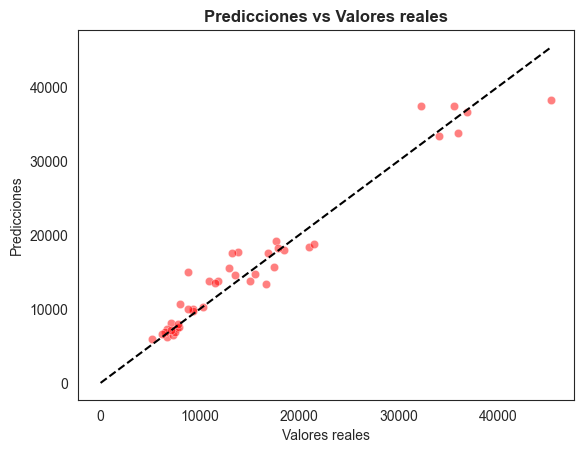

In [172]:
# Realizamos el grafico
sns.set_style("white")
sns.scatterplot(x=y_test, y= randomf_predict, color= 'red',alpha= 0.5)
plt.plot([y_test_sca.min(), y_test.max()], [y_test_sca.min(), y_test.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales", fontweight="bold")
plt.grid(False)

plt.show()

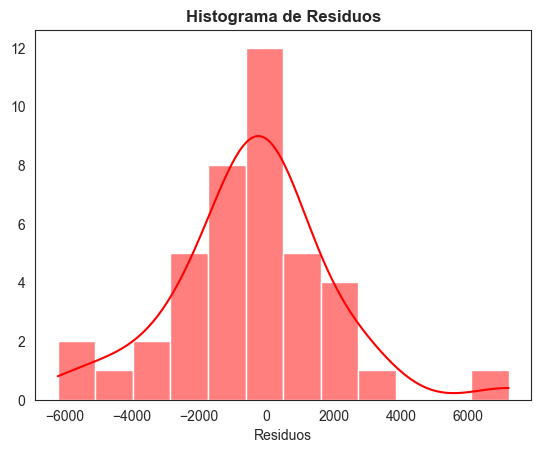

In [173]:
# Calculamos los errores
errores= y_test - randomf_predict

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(errores, color= 'red', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

Como podemos observar en el modelo de RandomForest tampoco hay diferencias significativas a la hora de entrenar el modelo con los datos escalados y sin escalar, de hecho podemos decir que se comporto mejor sin escalar los datos.

Viendo todo esto ahora veremos cuales son las variables que el modelo considera que son importantes, eso lo vemos con apartado del modelo de RandomForest que se demonima Feature Importance, el cual nos dice con un numero entre 0 y 1 que tan importante considera el modelo que es la variable para la prediccion de nuestro targe.

In [179]:
feature_importances = [(name, score) for name, score in zip(list(datos), randomforest.feature_importances_)]
feature_importances= pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])
feature_importances['Importance']= feature_importances['Importance'].apply( lambda x: round(x,5))

In [180]:
feature_importances.sort_values(by='Importance',ascending=False)

,Feature,Importance
44,enginesize,0.51269
43,curbweight,0.31162
51,highwaympg,0.05588
41,carwidth,0.02416
48,horsepower,0.01373
40,carlength,0.01226
50,citympg,0.01028
49,peakrpm,0.00927
47,compressionratio,0.00825
46,stroke,0.00572


In [ ]:
cars_category = pd.concat([cars_dummies, cars_numeric_sca['price']], axis=1)

y_cat=cars_category['price']
x_cat= cars_category.drop('price', axis= 1)

In [ ]:
x_train_cat, x_test_cat,y_train_cat, y_test_cat = train_test_split(x_cat, y_cat, test_size= 0.20, random_state= 18)

In [ ]:
randomf_cat= RandomForestRegressor()

randomf_cat.fit(x_train_cat, y_train_cat)

In [ ]:
randomf_predict_cat= randomf_cat.predict(x_test_cat) 

In [ ]:
mae = round(mean_absolute_error(y_test_sca, randomf_predict_cat),3)

r2 = round(r2_score(y_test_sca, randomf_predict_cat),3)

print(f"MAE: {mae}")
print(f"R²: {r2}")

In [ ]:
nombres_variables = x_train_cat.columns
importancias = randomf_cat.feature_importances_

print("La importancia de las características en el modelo de Random Forest:")
for nombre, importancia in zip(nombres_variables, importancias):
    print(f"{nombre}: {round(importancia, 2)}")

In [ ]:
x_num= cars_numeric_sca.drop('price',axis=1)
y_num=cars_numeric_sca['price']

In [ ]:
x_train_num, x_test_num, y_train_num,y_test_num = train_test_split(x_num,y_num, test_size=0.2, random_state=32)

In [ ]:
randomf_num= RandomForestRegressor()

In [ ]:
randomf_num.fit(x_train_num,y_train_num)

In [ ]:
randomf_predict_num= randomf_num.predict(x_test_num)

In [ ]:
mae = round(mean_absolute_error(y_test_sca, randomf_predict_num),3)

r2 = round(r2_score(y_test_sca, randomf_predict_num),3)

print(f"MAE: {mae}")
print(f"R²: {r2}")

In [ ]:
nombres_variables = x_train_num.columns
importancias = randomf_num.feature_importances_

print("La importancia de las características en el modelo de Random Forest:")
for nombre, importancia in zip(nombres_variables, importancias):
    print(f"{nombre}: {round(importancia, 2)}")

Entremaniento del RandomForestRegressor con los datos sin escalar
